In [1]:
import pandas as pd
raw = {"电影名称":["无闻东西","后来的我们","前任3","红海行动","唐人街探案","战狼2"],
      "打斗镜头":[1,5,12,108,112,115],
      "接吻镜头":[101,89,97,5,9,8],
      "电影类型":["爱情片","爱情片","爱情片","动作片","动作片","动作片"]}

In [2]:
raw_ = pd.DataFrame(raw)

In [3]:
raw

{'电影名称': ['无闻东西', '后来的我们', '前任3', '红海行动', '唐人街探案', '战狼2'],
 '打斗镜头': [1, 5, 12, 108, 112, 115],
 '接吻镜头': [101, 89, 97, 5, 9, 8],
 '电影类型': ['爱情片', '爱情片', '爱情片', '动作片', '动作片', '动作片']}

In [4]:
raw_

,电影名称,打斗镜头,接吻镜头,电影类型
0,无闻东西,1,101,爱情片
1,后来的我们,5,89,爱情片
2,前任3,12,97,爱情片
3,红海行动,108,5,动作片
4,唐人街探案,112,9,动作片
5,战狼2,115,8,动作片


In [8]:
new_data = [24,67]
dist = list(((raw_.iloc[:6,1:3]-new_data)**2).sum(1))
dist

[1685, 845, 1044, 10900, 11108, 11762]

In [11]:
import math
data = []
for i in dist:
    data.append(math.pow(i,0.5))
data

[41.048751503547585,
 29.068883707497267,
 32.31098884280702,
 104.4030650891055,
 105.39449701004318,
 108.45275469069469]

In [13]:
dist_1 = pd.DataFrame({"data":data,"label":(raw_.iloc[:,3])})
dist_1

,data,label
0,41.048752,爱情片
1,29.068884,爱情片
2,32.310989,爱情片
3,104.403065,动作片
4,105.394497,动作片
5,108.452755,动作片


In [14]:
dr = dist_1.sort_values(by = "data")[:4]
dr

,data,label
1,29.068884,爱情片
2,32.310989,爱情片
0,41.048752,爱情片
3,104.403065,动作片


In [15]:
re = dr.loc[:,"label"].value_counts()
re

爱情片    3
动作片    1
Name: label, dtype: int64

In [16]:
result = []
result.append(re.index[0])
result

['爱情片']

In [17]:
####封装成函数

In [28]:
import pandas as pd
import math
def Classfy(new_data,raw,k):
    results = []
    data = []
    dist = list(((raw.iloc[:,1:3]-new_data)**2).sum(1))
    for i in dist:
        data.append(math.pow(i,0.5))
    dist_1 = pd.DataFrame({"data":data,"labels":(raw.iloc[:,3])})
    dr = dist_1.sort_values(by = "data")[:k]
    re = dr.loc[:,"labels"].value_counts()
    results.append(re.index[0])
    return result

In [29]:
new_data = [24,67]
raw = raw_
k = 3
Classfy(new_data,raw,k)

['爱情片']

In [23]:
raw

,电影名称,打斗镜头,接吻镜头,电影类型
0,无闻东西,1,101,爱情片
1,后来的我们,5,89,爱情片
2,前任3,12,97,爱情片
3,红海行动,108,5,动作片
4,唐人街探案,112,9,动作片
5,战狼2,115,8,动作片


In [46]:
dating = pd.read_table(r"D:\面板数据文件\打印资料\机器学习实战\数据集\数据集\datingTestSet.txt",header = None)
dating

,0,1,2,3
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike
...,...,...,...,...
995,11145,3.410627,0.631838,smallDoses
996,68846,9.974715,0.669787,didntLike
997,26575,10.650102,0.866627,largeDoses
998,48111,9.134528,0.728045,largeDoses


In [32]:
dating.shape

(1000, 4)

In [33]:
dating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   int64  
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 31.4+ KB


In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
colors =[]
for i in range(dating.shape[0]):
    m = dating.iloc[i,-1]
    if m=="didntLike":
        colors.append("black")
    if m=="smallDoses":
        colors.append("orange")
    if m=="largeDoses":
        colors.append("red")

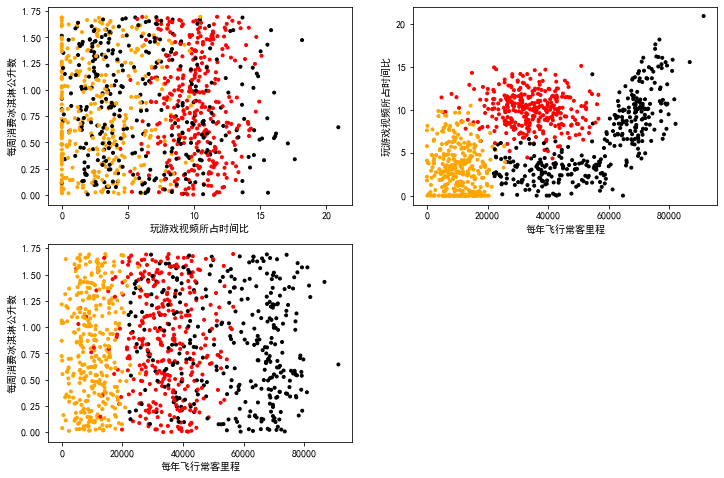

In [41]:
plt.rcParams["font.sans-serif"] = ["Simhei"]
p1 = plt.figure(figsize = (12,8))
fig1 = p1.add_subplot(221)
plt.scatter(dating.iloc[:,1],dating.iloc[:,2],marker = "." , c = colors)
plt.xlabel("玩游戏视频所占时间比")
plt.ylabel("每周消费冰淇淋公升数")

fig2 = p1.add_subplot(222)
plt.scatter(dating.iloc[:,0],dating.iloc[:,1],marker = "." , c = colors)
plt.xlabel("每年飞行常客里程")
plt.ylabel("玩游戏视频所占时间比")

fig3 = p1.add_subplot(223)
plt.scatter(dating.iloc[:,0],dating.iloc[:,2],marker = "." , c = colors)
plt.xlabel("每年飞行常客里程")
plt.ylabel("每周消费冰淇淋公升数")
plt.show()

In [42]:
def minmax(dataset):
    minDf = dataset.min()
    maxDf = dataset.max()
    normset = (dataset - minDf) / (maxDf - minDf)
    return normset

In [48]:
dating_ = pd.concat([minmax(dating.iloc[:,:3]), dating.iloc[:,3]], axis =1)
dating_.head()

,0,1,2,3
0,0.448325,0.398051,0.562334,largeDoses
1,0.158733,0.341955,0.987244,smallDoses
2,0.285429,0.068925,0.474496,didntLike
3,0.823201,0.628480,0.252489,didntLike
4,0.420102,0.079820,0.078578,didntLike


In [49]:
def randsplit(dataset,rate = 0.9):
    n = dataset.shape[0]
    m = int(n*rate)
    train = dataset.iloc[:m,:]
    test = dataset.iloc[m:,:]
    test.index = range(test.shape[0])
    return train , test

In [50]:
train ,test = randsplit(dating_)
train

,0,1,2,3
0,0.448325,0.398051,0.562334,largeDoses
1,0.158733,0.341955,0.987244,smallDoses
2,0.285429,0.068925,0.474496,didntLike
3,0.823201,0.628480,0.252489,didntLike
4,0.420102,0.079820,0.078578,didntLike
...,...,...,...,...
895,0.243665,0.486131,0.979099,largeDoses
896,0.165350,0.000000,0.808206,smallDoses
897,0.054967,0.359158,0.080380,smallDoses
898,0.111106,0.393932,0.058181,smallDoses


In [54]:
test.shape

(100, 4)

In [61]:
dist = []
def datingClass(train,test,k):
    n = train.shape[1] - 1
    m = test.shape[0]
    result = []
    for i in range(m):
        dist_ = list((((train.iloc[:,:n] - test.iloc[i,:n])**2).sum(1))**0.5)
        dist1 = pd.DataFrame({"dist":dist_,"labels":(train.iloc[:,n])})
        dr = dist1.sort_values(by = "dist")[:k]
        re = dr.loc[:,"labels"].value_counts()
        result.append(re.index[0])
    result = pd.Series(result)
    test["predict"] = result
    acc = (test.iloc[:,-1] ==test.iloc[:,-2]).mean()
    print(f"模型预测准确率为{acc}")
    return test

In [62]:
datingClass(train,test,5)

模型预测准确率为0.95


E:\environment\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,0,1,2,3,predict
0,0.513766,0.170320,0.262181,didntLike,didntLike
1,0.089599,0.154426,0.785277,smallDoses,smallDoses
2,0.611167,0.172689,0.915245,didntLike,didntLike
3,0.012578,0.000000,0.195477,smallDoses,smallDoses
4,0.110241,0.187926,0.287082,smallDoses,smallDoses
...,...,...,...,...,...
95,0.122106,0.163037,0.372224,smallDoses,smallDoses
96,0.754287,0.476818,0.394621,didntLike,didntLike
97,0.291159,0.509103,0.510795,largeDoses,largeDoses
98,0.527111,0.436655,0.429005,largeDoses,largeDoses
